In [26]:
import pandas as pd
df = pd.read_csv('database/perfiles_SI.csv', sep=',')

In [27]:
df.Type.unique()

array(['W', 'M', 'S', 'HP', 'C', 'MC', 'L', 'WT', 'MT', 'ST', '2L', 'HSS',
       'PIPE'], dtype=object)

## Propiedades del acero

In [28]:
E = 200000 #MPa
G = 77200 #MPa
Fy = 240 #MPa

## Verificación a compresión de arriostramientos

The effects of eccentricity on single angle members are permitted to be neglected
when evaluated as axially loaded compression members using one of the effective
slenderness ratios specified in Section E5(a) or E5(b), provided that:
- (1) members are loaded at the ends in compression through the same one leg;
- (2) members are attached by welding or by connections with a minimum of two
bolts; and
- (3) there are no intermediate transverse loads.

In [29]:
df_angulos = df[df['Type'].isin(['L','2L'])]

In [30]:
df_angulos

,Type,PERFIL_AISC,PERFIL_METRICO,W,A,d,ddet,Ht,h,OD,...,rts,ho,PA,PA2,PB,PC,PD,T,WGi,WGo
423,L,L12X12X1-3/8,L305X305X34.9,156.00,20100,305.0,NaN,NaN,NaN,NaN,...,NaN,NaN,914.0,914.0,1220.0,NaN,NaN,NaN,NaN,NaN
424,L,L12X12X1-1/4,L305X305X31.8,143.00,18300,305.0,NaN,NaN,NaN,NaN,...,NaN,NaN,914.0,914.0,1220.0,NaN,NaN,NaN,NaN,NaN
425,L,L12X12X1-1/8,L305X305X28.6,130.00,16600,305.0,NaN,NaN,NaN,NaN,...,NaN,NaN,914.0,914.0,1220.0,NaN,NaN,NaN,NaN,NaN
426,L,L12X12X1,L305X305X25.4,116.00,14800,305.0,NaN,NaN,NaN,NaN,...,NaN,NaN,914.0,914.0,1220.0,NaN,NaN,NaN,NaN,NaN
427,L,L10X10X1-3/8,L254X254X34.9,130.00,16500,254.0,NaN,NaN,NaN,NaN,...,NaN,NaN,762.0,762.0,1020.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,2L,2L2-1/2X1-1/2X1/4X3/8SLBB,2L64X38X6.4X9SLBB,9.49,1220,38.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,2L,2L2-1/2X1-1/2X1/4X3/4SLBB,2L64X38X6.4X19SLBB,9.49,1220,38.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,2L,2L2-1/2X1-1/2X3/16SLBB,2L64X38X4.8SLBB,7.26,935,38.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1522,2L,2L2-1/2X1-1/2X3/16X3/8SLBB,2L64X38X4.8X9SLBB,7.26,935,38.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
def filtrar_angulos_alas_iguales(df, columna='PERFIL_AISC', incluir_dobles=True):
    """
    Filtra ángulos de alas iguales desde una columna de perfiles AISC.
    Incluye ángulos simples (L) y dobles (2L) opcionalmente.
    
    Parámetros:
    -----------
    df : DataFrame
        DataFrame de pandas con la columna de perfiles
    columna : str
        Nombre de la columna que contiene los perfiles AISC
    incluir_dobles : bool
        Si True, incluye perfiles 2L. Si False, solo perfiles L simples.
    
    Retorna:
    --------
    DataFrame : DataFrame filtrado con solo ángulos de alas iguales
    
    Ejemplos que captura:
    ---------------------
    - L12X12X1
    - L6X6X1/2
    - 2L4X4X3/8
    - 2L8X8X1
    """
    
    # Patrón que incluye opcionalmente el "2" al inicio
    if incluir_dobles:
        patron = r'^(2)?L(\d+(?:/\d+)?|\d+\.\d+)X\2X'
    else:
        patron = r'^L(\d+(?:/\d+)?|\d+\.\d+)X\1X'
    
    mascara = df[columna].str.match(patron, na=False)
    return df[mascara]

df_angulos = filtrar_angulos_alas_iguales(df_angulos)

Valido que ángulos de la tabla tienen elementos esbeltos

For compression, sections are classified as nonslender element or slender-element
sections. For a nonslender element section, the width-to-thickness ratios of its compression elements shall not exceed λr from Table B4.1a. If the width-to-thickness
ratio of any compression element exceeds λr, the section is a slender-element section.

In [32]:
gamma_r = 0.56* (E/Fy)**(1/2)
print(f'La esbeltez límite es {round(gamma_r,2)}')

La esbeltez límite es 16.17


In [33]:
esbeltos = df_angulos[df_angulos['b/t']>gamma_r]

print(f'Hay {len(esbeltos)} ángulos esbeltos. Se los elimina')
print(esbeltos)

Hay 4 ángulos esbeltos. Se los elimina
    Type     PERFIL_AISC    PERFIL_METRICO     W     A      d  ddet  Ht   h  \
467    L       L6X6X5/16      L152X152X7.9  18.5  2370  152.0   NaN NaN NaN   
960   2L      2L6X6X5/16     2L152X152X7.9  37.0  4740  152.0   NaN NaN NaN   
961   2L  2L6X6X5/16X3/8   2L152X152X7.9X9  37.0  4740  152.0   NaN NaN NaN   
962   2L  2L6X6X5/16X3/4  2L152X152X7.9X19  37.0  4740  152.0   NaN NaN NaN   

     OD  ...  rts  ho     PA    PA2     PB  PC  PD   T  WGi  WGo  
467 NaN  ...  NaN NaN  457.0  457.0  610.0 NaN NaN NaN  NaN  NaN  
960 NaN  ...  NaN NaN    NaN    NaN    NaN NaN NaN NaN  NaN  NaN  
961 NaN  ...  NaN NaN    NaN    NaN    NaN NaN NaN NaN  NaN  NaN  
962 NaN  ...  NaN NaN    NaN    NaN    NaN NaN NaN NaN  NaN  NaN  

[4 rows x 83 columns]


In [34]:
df_angulos = df_angulos[df_angulos['b/t']<=gamma_r]

In [37]:
df_angulos[df_angulos['b/t']>20]

,Type,PERFIL_AISC,PERFIL_METRICO,W,A,d,ddet,Ht,h,OD,...,rts,ho,PA,PA2,PB,PC,PD,T,WGi,WGo


### Funciones para calcular resistencia

Tenemos la versión simplificada de E5, que impone 3 condiciones para el cálculo de la esbeltez efectiva. Tomamos el caso conservador que considera reticulados planos.

El camino riguroso es

Compute Pn using E3, E4, and E7 if slender per Table B4.1a. Buckling modes are flexural buckling (z-axis controls for typical cases) and flexural-torsional buckling. Compute Mn also. For an angle with typical connections through one leg, Pu is at an eccentricity relative to the centroid so it causes a moment also. This moment goes into the overall bending moment diagram and Mu is established. Take Pu, phiPn, Mu, and phiMn over to the interaction equations in Chapter H for evaluation. Vol 1 of the v15 Manual Companion example E.14 covers this.

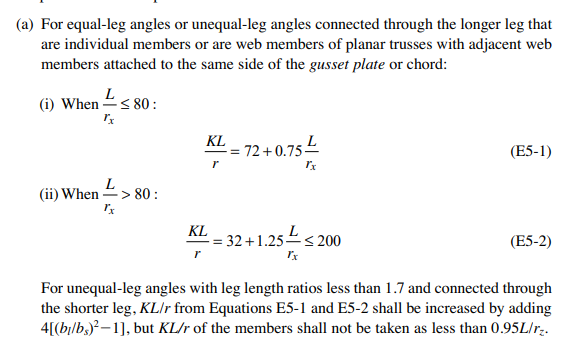

In [42]:
df_angulos

,Type,PERFIL_AISC,PERFIL_METRICO,W,A,d,ddet,Ht,h,OD,...,rts,ho,PA,PA2,PB,PC,PD,T,WGi,WGo
423,L,L12X12X1-3/8,L305X305X34.9,156.0,20100,305.0,NaN,NaN,NaN,NaN,...,NaN,NaN,914.0,914.0,1220.0,NaN,NaN,NaN,NaN,NaN
424,L,L12X12X1-1/4,L305X305X31.8,143.0,18300,305.0,NaN,NaN,NaN,NaN,...,NaN,NaN,914.0,914.0,1220.0,NaN,NaN,NaN,NaN,NaN
425,L,L12X12X1-1/8,L305X305X28.6,130.0,16600,305.0,NaN,NaN,NaN,NaN,...,NaN,NaN,914.0,914.0,1220.0,NaN,NaN,NaN,NaN,NaN
426,L,L12X12X1,L305X305X25.4,116.0,14800,305.0,NaN,NaN,NaN,NaN,...,NaN,NaN,914.0,914.0,1220.0,NaN,NaN,NaN,NaN,NaN
427,L,L10X10X1-3/8,L254X254X34.9,130.0,16500,254.0,NaN,NaN,NaN,NaN,...,NaN,NaN,762.0,762.0,1020.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,2L,2L2X2X3/16X3/8,2L51X51X4.8X9,7.2,929,50.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,2L,2L2X2X3/16X3/4,2L51X51X4.8X19,7.2,929,50.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,2L,2L2X2X1/8,2L51X51X3.2,4.8,634,50.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,2L,2L2X2X1/8X3/8,2L51X51X3.2X9,4.8,634,50.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
import numpy as np

def resistencia_angulo_compresion(designacion, df_tabla, Lx, Ly, Lz, Fy=240, E=200000, 
                                   tipo_armadura='plana', verbose=False):
    """
    Calcula resistencia a compresión de ángulo simple según AISC 360.
    Unidades: SI (mm, MPa, kN)
    
    Parámetros:
    -----------
    designacion : str
        Nombre del perfil (ej: 'L6X6X1/2')
    df_tabla : DataFrame
        Tabla AISC con columnas: PERFIL_AISC, A, rx, ry, rz
    Lx : float
        Longitud no arriostrada eje x (cm)
    Ly : float
        Longitud no arriostrada eje y (cm)
    Lz : float
        Longitud no arriostrada eje z (cm)
    Fy : float
        Tensión de fluencia (MPa). Default: 240
    E : float
        Módulo de elasticidad (MPa). Default: 200000
    tipo_armadura : str
        'plana' o 'espacial'. Default: 'plana'
    verbose : bool
        Si True, muestra el proceso de cálculo paso a paso. Default: False
    
    Retorna:
    --------
    dict con Pn, phi_Pn, Pn_Omega, KL_r_eff, Fcr, regimen
    """
    
    if verbose:
        print("=" * 80)
        print("VERIFICACIÓN DE ÁNGULO SIMPLE A COMPRESIÓN - AISC 360-16")
        print("=" * 80)
        print(f"\n>>> PASO 1: Búsqueda de propiedades del perfil '{designacion}'")
    
    # Buscar perfil en tabla
    perfil = df_tabla[df_tabla['PERFIL_AISC'] == designacion].iloc[0]
    
    # Propiedades
    Ag = perfil['A']      # mm²
    rx = perfil['rx']     # mm
    ry = perfil['ry']     # mm
    rz = perfil['rz']     # mm
    
    if verbose:
        print(f"    Área bruta (Ag):           {Ag:.2f} mm²")
        print(f"    Radio de giro rx:          {rx:.2f} mm")
        print(f"    Radio de giro ry:          {ry:.2f} mm")
        print(f"    Radio de giro rz:          {rz:.2f} mm")
        print(f"\n>>> PASO 2: Cálculo de relaciones de esbeltez geométricas")
        print(f"    Longitud Lx:               {Lx:.2f} cm = {Lx*10:.0f} mm")
        print(f"    Longitud Ly:               {Ly:.2f} cm = {Ly*10:.0f} mm")
        print(f"    Longitud Lz:               {Lz:.2f} cm = {Lz*10:.0f} mm")
    
    # Esbelteces geométricas
    KL_rx = Lx * 10 / rx
    KL_ry = Ly * 10 / ry
    KL_rz = Lz * 10 / rz
    
    if verbose:
        print(f"    KL/rx:                     {KL_rx:.2f}")
        print(f"    KL/ry:                     {KL_ry:.2f}")
        print(f"    KL/rz:                     {KL_rz:.2f}")
    
    # Esbeltez efectiva según tipo de armadura
    if verbose:
        print(f"\n>>> PASO 3: Cálculo de esbeltez efectiva (AISC 360 Sección E5)")
        print(f"    Tipo de armadura:          {tipo_armadura}")
    
    if tipo_armadura == 'plana':
        # AISC E5(a)
        if verbose:
            print(f"    Aplicando AISC E5(a) - Armadura plana")
        
        if KL_rx <= 80:
            KL_r_eff = 72 + 0.75 * KL_rx
            if verbose:
                print(f"    Como KL/rx = {KL_rx:.2f} ≤ 80:")
                print(f"    (KL/r)eff = 72 + 0.75 × {KL_rx:.2f} = {KL_r_eff:.2f}")
        else:
            KL_r_eff = 32 + 1.25 * KL_rx
            if verbose:
                print(f"    Como KL/rx = {KL_rz:.2f} > 80:")
                print(f"    (KL/r)eff = 32 + 1.25 × {KL_rz:.2f} = {KL_r_eff:.2f}")
    else:  # espacial
        # AISC E5(b)
        if verbose:
            print(f"    Aplicando AISC E5(b) - Armadura espacial")
        
        if KL_rx <= 75:
            KL_r_eff = 60 + 0.80 * KL_rx
            if verbose:
                print(f"    Como KL/rx = {KL_rx:.2f} ≤ 75:")
                print(f"    (KL/r)eff = 60 + 0.80 × {KL_rx:.2f} = {KL_r_eff:.2f}")
        else:
            KL_r_eff = 45 + 1.00 * KL_rx
            if verbose:
                print(f"    Como KL/rx = {KL_rz:.2f} > 75:")
                print(f"    (KL/r)eff = 45 + 1.00 × {KL_rx:.2f} = {KL_r_eff:.2f}")
    
    
    if verbose:
        print(f"    (KL/r)eff final (≤ 200):   {KL_r_eff:.2f}")
    
    # Tensión crítica elástica
    Fe = np.pi**2 * E / KL_r_eff**2
    
    if verbose:
        print(f"\n>>> PASO 4: Tensión crítica de pandeo elástico (AISC E3-4)")
        print(f"    Fe = π² × E / (KL/r)²")
        print(f"    Fe = π² × {E} / {KL_r_eff:.2f}²")
        print(f"    Fe = {Fe:.2f} MPa")
    
    # Determinar régimen
    limite_regimen = 4.71 * np.sqrt(E / Fy)
    
    if verbose:
        print(f"\n>>> PASO 5: Determinación del régimen de pandeo")
        print(f"    Límite = 4.71 × √(E/Fy) = 4.71 × √({E}/{Fy})")
        print(f"    Límite = {limite_regimen:.2f}")
        print(f"    (KL/r)eff = {KL_r_eff:.2f}")
    
    # Fcr según régimen
    if KL_r_eff <= limite_regimen:
        Fcr = (0.658 ** (Fy / Fe)) * Fy
        regimen = 'Inelástico'
        if verbose:
            print(f"    Como {KL_r_eff:.2f} ≤ {limite_regimen:.2f} → Pandeo INELÁSTICO")
            print(f"\n>>> PASO 6: Tensión crítica de pandeo (AISC E3-2)")
            print(f"    Fcr = [0.658^(Fy/Fe)] × Fy")
            print(f"    Fcr = [0.658^({Fy}/{Fe:.2f})] × {Fy}")
            print(f"    Fcr = {Fcr:.2f} MPa")
    else:
        Fcr = 0.877 * Fe
        regimen = 'Elástico'
        if verbose:
            print(f"    Como {KL_r_eff:.2f} > {limite_regimen:.2f} → Pandeo ELÁSTICO")
            print(f"\n>>> PASO 6: Tensión crítica de pandeo (AISC E3-3)")
            print(f"    Fcr = 0.877 × Fe")
            print(f"    Fcr = 0.877 × {Fe:.2f}")
            print(f"    Fcr = {Fcr:.2f} MPa")
    
    # Resistencias
    Pn = Fcr * Ag * 1e-3  # kN
    phi_Pn = 0.90 * Pn
    Pn_Omega = Pn / 1.67
    
    if verbose:
        print(f"\n>>> PASO 7: Resistencia nominal (AISC E3-1)")
        print(f"    Pn = Fcr × Ag")
        print(f"    Pn = {Fcr:.2f} MPa × {Ag:.2f} mm²")
        print(f"    Pn = {Pn:.2f} kN")
        print(f"\n>>> PASO 8: Resistencias de diseño")
        print(f"    LRFD: φPn  = 0.90 × {Pn:.2f} = {phi_Pn:.2f} kN")
        print(f"    ASD:  Pn/Ω = {Pn:.2f} / 1.67 = {Pn_Omega:.2f} kN")
        print("=" * 80)
    
    return {
        'Pn': Pn,
        'phi_Pn': phi_Pn,
        'Pn_Omega': Pn_Omega,
        'KL_r_eff': KL_r_eff,
        'Fcr': Fcr,
        'regimen': regimen
    }

In [66]:
resistencia_angulo_compresion('L4X4X1/4', df_angulos, 400, 400,400, Fy = 240, E=200000, 
                                   tipo_armadura='plana',verbose = True)


VERIFICACIÓN DE ÁNGULO SIMPLE A COMPRESIÓN - AISC 360-16

>>> PASO 1: Búsqueda de propiedades del perfil 'L4X4X1/4'
    Área bruta (Ag):           1250.00 mm²
    Radio de giro rx:          31.80 mm
    Radio de giro ry:          31.80 mm
    Radio de giro rz:          19.90 mm

>>> PASO 2: Cálculo de relaciones de esbeltez geométricas
    Longitud Lx:               400.00 cm = 4000 mm
    Longitud Ly:               400.00 cm = 4000 mm
    Longitud Lz:               400.00 cm = 4000 mm
    KL/rx:                     125.79
    KL/ry:                     125.79
    KL/rz:                     201.01

>>> PASO 3: Cálculo de esbeltez efectiva (AISC 360 Sección E5)
    Tipo de armadura:          plana
    Aplicando AISC E5(a) - Armadura plana
    Como KL/rx = 201.01 > 80:
    (KL/r)eff = 32 + 1.25 × 201.01 = 189.23
    (KL/r)eff final (≤ 200):   189.23

>>> PASO 4: Tensión crítica de pandeo elástico (AISC E3-4)
    Fe = π² × E / (KL/r)²
    Fe = π² × 200000 / 189.23²
    Fe = 55.12 MPa

>>>

{'Pn': 60.42921536383781,
 'phi_Pn': 54.38629382745403,
 'Pn_Omega': 36.18515890050168,
 'KL_r_eff': 189.2327044025157,
 'Fcr': 48.343372291070246,
 'regimen': 'Elástico'}

Armo un gráfico para ver todos los ángulos simples

In [67]:
df_angulos_simples = df_angulos[df_angulos['PERFIL_AISC'].str.startswith('L')]
df_angulos_dobles = df_angulos[df_angulos['PERFIL_AISC'].str.startswith('2L')]

In [74]:


def generar_dataframe_curvas_resistencia(df_angulos, L_min=50, L_max=1000.0, 
                                          paso=10, Fy=240, E=200000, 
                                          tipo_armadura='plana'):
    """
    Genera DataFrame con curvas de resistencia vs longitud para todos los ángulos.
    
    Parámetros:
    -----------
    df_angulos : DataFrame
        Tabla con perfiles de ángulos
    L_min : float
        Longitud mínima en metros. Default: 0.5 m
    L_max : float
        Longitud máxima en metros. Default: 10.0 m
    paso : float
        Incremento de longitud en metros. Default: 0.1 m (10 cm)
    Fy : float
        Tensión de fluencia (MPa). Default: 240
    E : float
        Módulo de elasticidad (MPa). Default: 200000
    tipo_armadura : str
        'plana' o 'espacial'. Default: 'plana'
    
    Retorna:
    --------
    DataFrame con columnas:
        - 'perfil': Designación del perfil
        - 'L': Longitud del elemento (m)
        - 'phi_Pn': Resistencia de diseño LRFD (kN)
        - 'Pn': Resistencia nominal (kN)
        - 'KL_r_eff': Esbeltez efectiva
        - 'cumple_esbeltez': True si KL/r ≤ 200, False si > 200
        - 'Fcr': Tensión crítica (MPa)
        - 'regimen': 'Inelástico' o 'Elástico'
    """
    
    # Vector de longitudes
    longitudes = np.arange(L_min, L_max + paso, paso)
    
    # Lista para almacenar resultados
    datos = []
    
    # Iterar sobre cada perfil
    for idx, perfil_row in df_angulos.iterrows():
        designacion = perfil_row['PERFIL_AISC']
        
        print(f"Procesando {designacion}...")
        
        # Calcular para cada longitud
        for L in longitudes:
            try:
                resultado = resistencia_angulo_compresion(
                    designacion=designacion,
                    df_tabla=df_angulos,
                    Lx=L,
                    Ly=L,
                    Lz=L,
                    Fy=Fy,
                    E=E,
                    tipo_armadura=tipo_armadura,
                    verbose=False
                )
                
                datos.append({
                    'perfil': designacion,
                    'L': L,
                    'phi_Pn': resultado['phi_Pn'],
                    'Pn': resultado['Pn'],
                    'KL_r_eff': resultado['KL_r_eff'],
                    'cumple_esbeltez': resultado['KL_r_eff'] <= 200,
                    'Fcr': resultado['Fcr'],
                    'regimen': resultado['regimen']
                })
                
            except Exception as e:
                print(f"  Error en {designacion} con L={L}: {e}")
                continue
    
    df_curvas = pd.DataFrame(datos)
    
    print(f"\nDataFrame generado: {len(df_curvas)} puntos")
    print(f"Perfiles únicos: {df_curvas['perfil'].nunique()}")
    
    return df_curvas


# Generar el DataFrame
df_curvas = generar_dataframe_curvas_resistencia(
    df_angulos=df_angulos_simples,
    L_min=50,   # 50 cm
    L_max=1000.0,  # 10 m
    paso=10,    # 10 cm
    Fy=240
)

# Guardar si quieres
#df_curvas.to_csv('curvas_resistencia_angulos.csv', index=False)

# Ver estructura
print(df_curvas.head(20))
print(f"\nResumen por perfil:")
print(df_curvas.groupby('perfil').agg({
    'L': ['min', 'max', 'count'],
    'phi_Pn': ['min', 'max'],
    'cumple_esbeltez': 'sum'
}))

Procesando L12X12X1-3/8...
Procesando L12X12X1-1/4...
Procesando L12X12X1-1/8...
Procesando L12X12X1...
Procesando L10X10X1-3/8...
Procesando L10X10X1-1/4...
Procesando L10X10X1-1/8...
Procesando L10X10X1...
Procesando L10X10X7/8...
Procesando L10X10X3/4...
Procesando L8X8X1-1/8...
Procesando L8X8X1...
Procesando L8X8X7/8...
Procesando L8X8X3/4...
Procesando L8X8X5/8...
Procesando L8X8X9/16...
Procesando L8X8X1/2...
Procesando L6X6X1...
Procesando L6X6X7/8...
Procesando L6X6X3/4...
Procesando L6X6X5/8...
Procesando L6X6X9/16...
Procesando L6X6X1/2...
Procesando L6X6X7/16...
Procesando L6X6X3/8...
Procesando L5X5X7/8...
Procesando L5X5X3/4...
Procesando L5X5X5/8...
Procesando L5X5X1/2...
Procesando L5X5X7/16...
Procesando L5X5X3/8...
Procesando L5X5X5/16...
Procesando L4X4X3/4...
Procesando L4X4X5/8...
Procesando L4X4X1/2...
Procesando L4X4X7/16...
Procesando L4X4X3/8...
Procesando L4X4X5/16...
Procesando L4X4X1/4...
Procesando L3X3X1/2...
Procesando L3X3X7/16...
Procesando L3X3X3/8...


In [75]:
df_curvas

,perfil,L,phi_Pn,Pn,KL_r_eff,cumple_esbeltez,Fcr,regimen
0,L12X12X1-3/8,50.0,3234.538405,3593.931561,76.054054,True,178.802565,Inelástico
1,L12X12X1-3/8,60.0,3214.193632,3571.326258,76.864865,True,177.677923,Inelástico
2,L12X12X1-3/8,70.0,3193.763119,3548.625688,77.675676,True,176.548542,Inelástico
3,L12X12X1-3/8,80.0,3173.250137,3525.833485,78.486486,True,175.414601,Inelástico
4,L12X12X1-3/8,90.0,3152.657951,3502.953279,79.297297,True,174.276283,Inelástico
...,...,...,...,...,...,...,...,...
4795,L2X2X1/8,960.0,0.778832,0.865369,796.331210,False,2.729869,Elástico
4796,L2X2X1/8,970.0,0.763489,0.848321,804.292994,False,2.676090,Elástico
4797,L2X2X1/8,980.0,0.748594,0.831772,812.254777,False,2.623885,Elástico
4798,L2X2X1/8,990.0,0.734132,0.815702,820.216561,False,2.573192,Elástico


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def graficar_curvas_interactivas(df_curvas):
    """
    Crea gráfico interactivo con botones para activar/desactivar perfiles.
    Puntos verdes: KL/r ≤ 200
    Puntos rojos: KL/r > 200
    """
    
    fig = go.Figure()
    
    # Obtener lista de perfiles únicos
    perfiles = df_curvas['perfil'].unique()
    
    # Agregar una traza por cada perfil
    for perfil in perfiles:
        df_perfil = df_curvas[df_curvas['perfil'] == perfil]
        
        # Separar puntos que cumplen y no cumplen esbeltez
        df_cumple = df_perfil[df_perfil['cumple_esbeltez'] == True]
        df_no_cumple = df_perfil[df_perfil['cumple_esbeltez'] == False]
        
        # Traza para puntos que CUMPLEN (verde)
        if len(df_cumple) > 0:
            fig.add_trace(go.Scatter(
                x=df_cumple['L'],
                y=df_cumple['phi_Pn'],
                mode='lines+markers',
                name=f'{perfil}',
                line=dict(width=2),
                marker=dict(size=4, color='green'),
                legendgroup=perfil,
                showlegend=True,
                hovertemplate=
                    f'<b>{perfil}</b><br>' +
                    'L: %{x:.2f} m<br>' +
                    'φPn: %{y:.2f} kN<br>' +
                    'KL/r: %{customdata:.1f}<br>' +
                    '<extra></extra>',
                customdata=df_cumple['KL_r_eff']
            ))
        
        # Traza para puntos que NO CUMPLEN (rojo)
        if len(df_no_cumple) > 0:
            fig.add_trace(go.Scatter(
                x=df_no_cumple['L'],
                y=df_no_cumple['phi_Pn'],
                mode='lines+markers',
                name=f'{perfil} (KL/r > 200)',
                line=dict(width=2, dash='dash'),
                marker=dict(size=4, color='red'),
                legendgroup=perfil,
                showlegend=True,
                hovertemplate=
                    f'<b>{perfil}</b><br>' +
                    'L: %{x:.2f} m<br>' +
                    'φPn: %{y:.2f} kN<br>' +
                    'KL/r: %{customdata:.1f} ⚠️<br>' +
                    '<extra></extra>',
                customdata=df_no_cumple['KL_r_eff']
            ))
    
    # Configuración del layout
    fig.update_layout(
        title='Curvas de Resistencia a Compresión - Ángulos Simples AISC 360',
        xaxis_title='Longitud del Elemento (m)',
        yaxis_title='Resistencia de Diseño φPn (kN)',
        hovermode='closest',
        template='plotly_white',
        width=1200,
        height=700,
        legend=dict(
            title='Perfiles (click para activar/desactivar)',
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=1.02
        )
    )
    
    # Agregar línea de referencia en KL/r = 200
    # (opcional, para indicar visualmente el límite)
    
    fig.show()
    
    return fig

# Crear gráfico
fig = graficar_curvas_interactivas(df_curvas)

: 